In [1]:
import tarfile, os
import operationUtils as op
datasets_path = F"C:/Users/elada/OneDrive - Technion/projB_SIPL/Datasets/"
#with tarfile.open

import torchvision.datasets.cifar as cifar

cifar_trainset = cifar.CIFAR10(root='./data', train=True, download=True, transform=None)

Files already downloaded and verified


In [2]:
import operationUtils as op
x = cifar_trainset.data
data_cs = x.reshape(-1, x.shape[1]*x.shape[2]*x.shape[3]).T
data_cs.shape

(3072, 50000)

In [3]:
data_restored = op.reshape_as_pics(data_cs, 1)
data_restored.shape

(50000, 32, 32, 3)

In [4]:
import numpy as np
np.all(data_restored == x)

True

In [5]:

import cv2
x_reshaped = op.resize_dataset(x, 7,is_rgb=1)
x_reshaped.shape

(50000, 7, 7, 3)

In [6]:

import mnist
remote_flag = 0
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)
x_train = mnist.train_images()

In [7]:
mnist_reshaped = op.resize_dataset(x_train, 7)
mnist_reshaped.shape


(60000, 7, 7)

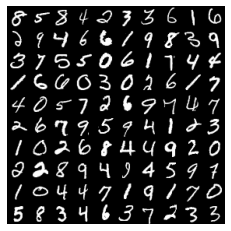

In [8]:
from matplotlib import pyplot as plt
from matplotlib import colors

x_train_cs = op.flatten_and_fit_dims(x_train, is_rgb=0)
collage = op.convert_data_to_collage(x_train_cs, is_rgb=0)
plt.imshow(collage/255, cmap=plt.cm.gray,norm=colors.Normalize())
plt.axis('off')
plt.show()

In [9]:
x_cs = op.flatten_and_fit_dims(x, is_rgb=1)
x_cs
x_im_view = op.reshape_as_pics(x_cs, is_rgb=1)
x_channel1 = np.squeeze(x_im_view[:,:,:,0])
x_channel2 = np.squeeze(x_im_view[:,:,:,1])
x_channel3 = np.squeeze(x_im_view[:,:,:,2])

padding_factor = 1
npad = ((0, 0), (padding_factor, padding_factor), (padding_factor, padding_factor), (0, 0))
x_padded = np.pad(x_im_view, pad_width=npad, mode='constant', constant_values=0)#[:, :, 1:-1]

In [10]:
im11 = np.ones((7,7))
im12 = 2*np.ones((7,7))
im13 = 3*np.ones((7,7))
im1 = np.zeros((7,7,3))

im1[:,:,0] = im11
im1[:,:,1] = im12
im1[:,:,2] = im13

#im1 = x_padded[0, :,:,:]
chan1, chan2, chan3 = op.im3D2col_sliding_strided(im1, (3,3))
unified = np.concatenate((chan1, chan2, chan3),axis=0)
unified[:,0]

ValueError: too many values to unpack (expected 3)

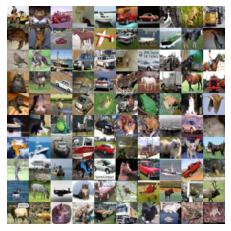

(320, 320, 3)

In [11]:
p, pf = op.split_to_patches(x_cs[:,0:300], 5, padding_flag=1, stride=1, is_rgb=1)
x_recon = op.reconstruct_from_patches(p, 5, pf, is_rgb=1)

collage = op.convert_data_to_collage(x_recon, is_rgb=1)
plt.imshow(collage/255, norm=colors.Normalize())
plt.axis('off')
plt.show()

collage.shape
p

In [19]:
#p = op.im2col_sliding_strided(x_train[0,:,:],(5,5))
#p.shape

im2 = np.dstack((im11, im12, im13))
im2.shape

(7, 7, 3)

In [24]:
y = cifar_trainset.targets
np.unique(y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
import operationUtils as op
import numpy as np
H_raw = op.gen_rand_projections_mat(15, 10)
row_sums = np.sum(H_raw**2, axis=1)
row_sums = row_sums.reshape(-1,1)
np.sum((H_raw / np.sqrt(row_sums))**2, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [31]:
from sklearn import datasets

from matplotlib import pyplot as plt
from matplotlib import colors

a = datasets.make_swiss_roll(n_samples=1000)
x = a[0][:,0]
y = a[0][:,1]
z = a[0][:,2]
plt.scatter(x, z)
plt.show()

ValueError: too many values to unpack (expected 3)